<a href="https://colab.research.google.com/github/WanQi-K/DataSciencePortfolio/blob/main/26_Screen_Time_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle


import os
os.environ['KAGGLE_USERNAME'] = "WanQi83"
os.environ['KAGGLE_KEY'] = "your_kaggle_api_key"

from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi()
api.authenticate()
api.dataset_download_files('ruchi798/analyzing-screen-time', path='./', unzip=True)

Dataset URL: https://www.kaggle.com/datasets/ruchi798/analyzing-screen-time


In [ ]:
import pandas as pd

app_details_data = pd.read_csv('Screentime - App Details.csv')

app_ranking_data = pd.read_csv('Screentime - App Ranking.csv')

overall_usage_data = pd.read_csv('Screentime - Overall Usage.csv')

In [ ]:
app_details_data.head()

,Date,Usage,Notifications,Times opened,App
0,08/26/2022,38,70,49,Instagram
1,08/27/2022,39,43,48,Instagram
2,08/28/2022,64,231,55,Instagram
3,08/29/2022,14,35,23,Instagram
4,08/30/2022,3,19,5,Instagram


In [ ]:
app_details_data['Date'] = pd.to_datetime(app_details_data['Date'])

In [ ]:
# Pivot Dataset 1: Usage per app per date
app_details_data_pivot_usage = app_details_data.pivot(index='Date', columns='App', values='Usage').fillna(0)
app_details_data_pivot_opened = app_details_data.pivot(index='Date', columns='App', values='Times opened').fillna(0)
app_details_data_pivot_notifs = app_details_data.pivot(index='Date', columns='App', values='Notifications').fillna(0)

# Rename columns for clarity
app_details_data_pivot_usage.columns = [f"{app}_Usage" for app in app_details_data_pivot_usage.columns]
app_details_data_pivot_opened.columns = [f"{app}_Opened" for app in app_details_data_pivot_opened.columns]
app_details_data_pivot_notifs.columns = [f"{app}_Notifications" for app in app_details_data_pivot_notifs.columns]


# Reset index to merge
app_details_data_pivot_usage = app_details_data_pivot_usage.reset_index()
app_details_data_pivot_opened = app_details_data_pivot_opened.reset_index()
app_details_data_pivot_notifs = app_details_data_pivot_notifs.reset_index()

# Combine all pivoted DataFrames from Dataset 1
app_details_pivot = pd.merge(app_details_data_pivot_usage, app_details_data_pivot_opened, on='Date', how='outer')
app_details_pivot = pd.merge(app_details_pivot, app_details_data_pivot_notifs, on='Date', how='outer')

In [ ]:
app_details_pivot

,Date,Instagram_Usage,Whatsapp_Usage,Instagram_Opened,Whatsapp_Opened,Instagram_Notifications,Whatsapp_Notifications
0,2022-08-26,38,82,49,105,70,209
1,2022-08-27,39,69,48,68,43,111
2,2022-08-28,64,130,55,86,231,183
3,2022-08-29,14,59,23,74,35,157
4,2022-08-30,3,128,5,87,19,246
5,2022-08-31,19,108,20,77,25,169
6,2022-09-01,44,23,57,47,23,99
7,2022-09-02,16,76,22,103,28,144
8,2022-09-03,27,1,25,16,15,80
9,2022-09-04,72,6,30,33,29,38


In [ ]:
app_ranking_data['Date '] = pd.to_datetime(app_ranking_data['Date '])
app_ranking_data = app_ranking_data.rename(columns={'Date ': 'Date'})

overall_usage_data['Date '] = pd.to_datetime(overall_usage_data['Date '])
overall_usage_data = overall_usage_data.rename(columns={'Date ': 'Date'})

In [ ]:
data_combined = pd.merge(app_details_pivot, app_ranking_data, on='Date', how='outer')

In [ ]:
data_combined = pd.merge(data_combined, overall_usage_data, on='Date', how='outer')

In [ ]:
data_combined.head()

,Date,Instagram_Usage,Whatsapp_Usage,Instagram_Opened,Whatsapp_Opened,Instagram_Notifications,Whatsapp_Notifications,Rank 1,Rank 2,Rank 3,Total Usage,Notifications,Unlocks
0,2022-08-26,38,82,49,105,70,209,Whatsapp,Instagram,Netflix,236,600,102
1,2022-08-27,39,69,48,68,43,111,Whatsapp,Instagram,Chrome,194,411,96
2,2022-08-28,64,130,55,86,231,183,Whatsapp,Instagram,WeChat,301,709,114
3,2022-08-29,14,59,23,74,35,157,Whatsapp,Chrome,WeChat,190,542,119
4,2022-08-30,3,128,5,87,19,246,Whatsapp,LinkedIn,Chrome,204,583,85


In [ ]:
data_combined['dayofweek'] = data_combined['Date'].dt.day_name()

# EDA

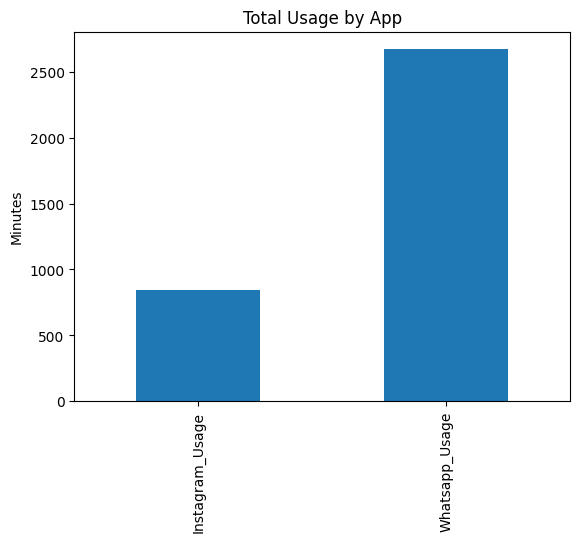

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Top apps by total usage
app_usage = data_combined[['Instagram_Usage', 'Whatsapp_Usage']].sum()
app_usage.plot(kind='bar', title='Total Usage by App')
plt.ylabel('Minutes')
plt.show()

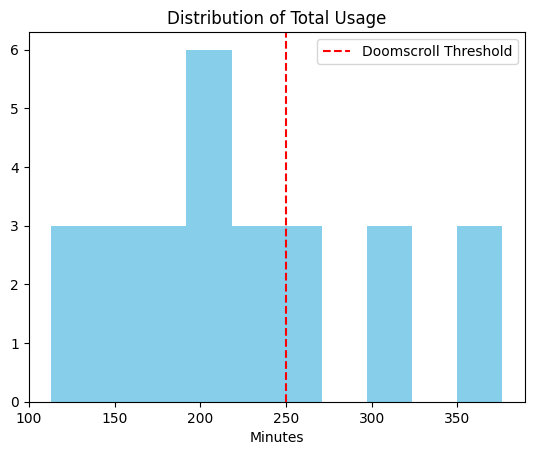

Mean Usage: 229.0
Avg Social Share: 0.5456127671850767


In [ ]:
# Total Usage Breakdown
plt.hist(data_combined['Total Usage'], bins=10, color='skyblue')
plt.title("Distribution of Total Usage")
plt.xlabel("Minutes")
plt.axvline(250, color='red', linestyle='--', label='Doomscroll Threshold')
plt.legend()
plt.savefig("usage_dist.png")
plt.show()
print("Mean Usage:", data_combined['Total Usage'].mean())

data_combined['Social_Share'] = (data_combined['Instagram_Usage'] + data_combined['Whatsapp_Usage']) / df['Total Usage']
print("Avg Social Share:", data_combined['Social_Share'].mean())

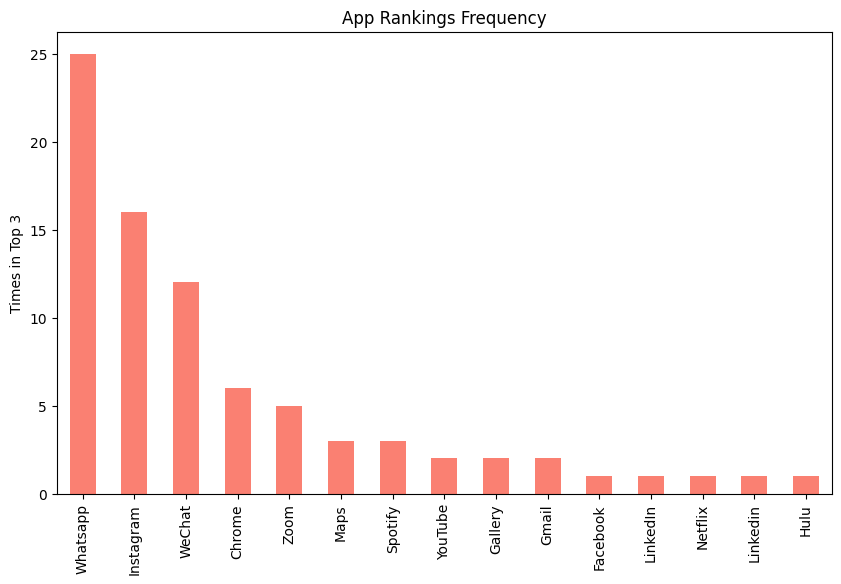

Rank Frequency:
 Whatsapp     25
Instagram    16
WeChat       12
Chrome        6
Zoom          5
Maps          3
Spotify       3
YouTube       2
Gallery       2
Gmail         2
Facebook      1
LinkedIn      1
Netflix       1
Linkedin      1
Hulu          1
Name: count, dtype: int64


In [ ]:
# Ranking Frequency
rank_counts = pd.concat([data_combined['Rank 1'], data_combined['Rank 2'], data_combined['Rank 3']]).value_counts()
plt.figure(figsize=(10, 6))
rank_counts.plot(kind='bar', color='salmon')
plt.title("App Rankings Frequency")
plt.ylabel("Times in Top 3")
plt.show()
print("Rank Frequency:\n", rank_counts)

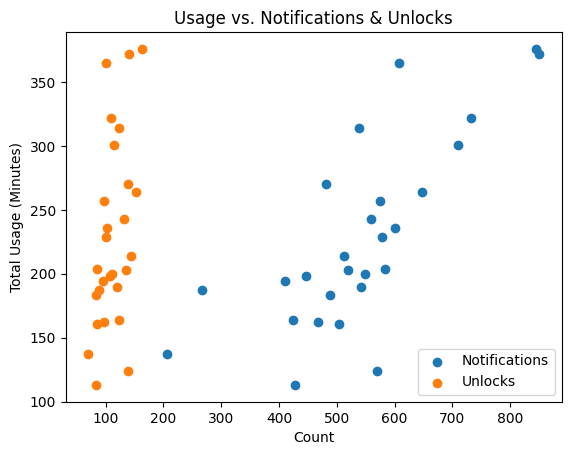

In [ ]:
# Notifications, Unlocks vs Usage
plt.scatter(data_combined['Notifications'], data_combined['Total Usage'], label='Notifications')
plt.scatter(data_combined['Unlocks'], data_combined['Total Usage'], label='Unlocks')
plt.xlabel("Count")
plt.ylabel("Total Usage (Minutes)")
plt.title("Usage vs. Notifications & Unlocks")
plt.legend()
plt.show()

# Notifications have stronger impact on Total Usage

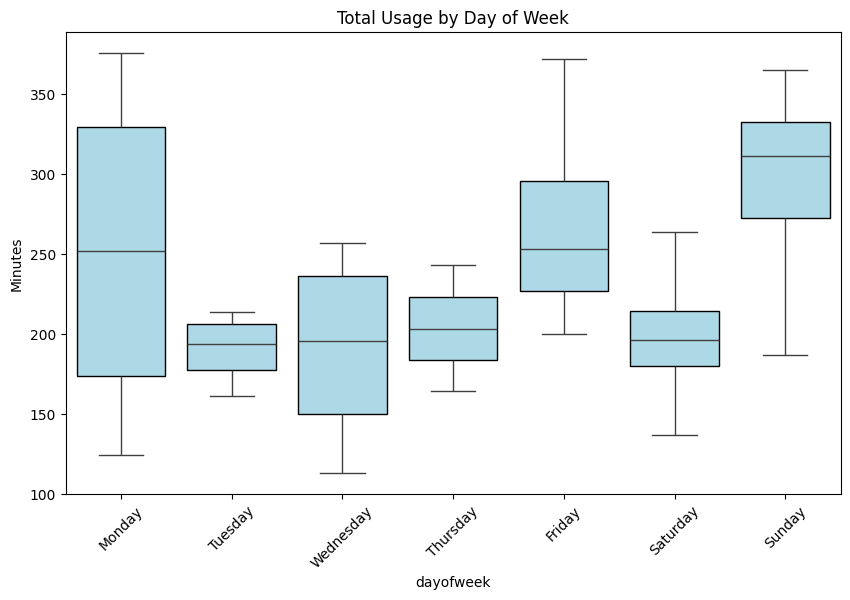

In [ ]:
# Day of Week Trends

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
data_combined['dayofweek'] = pd.Categorical(data_combined['dayofweek'], categories=day_order, ordered=True)

plt.figure(figsize=(10, 6))
sns.boxplot(x='dayofweek', y='Total Usage', data=data_combined, order=day_order,
            boxprops=dict(facecolor='lightblue', edgecolor='black', alpha=1))
plt.title("Total Usage by Day of Week")
plt.ylabel("Minutes")
plt.xticks(rotation=45)
plt.show()

#Insight: “Sunday’s median ~300 mins—doomscroll central?”

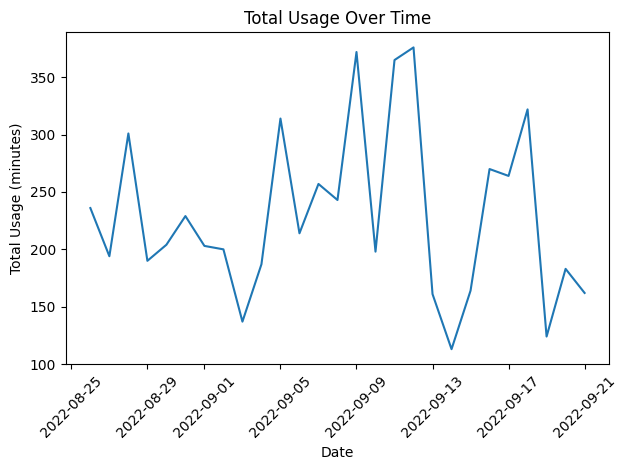

In [ ]:
## Daily Trend (Line Graph)
plt.plot(data_combined['Date'], data_combined['Total Usage'])
plt.xlabel('Date')
plt.ylabel('Total Usage (minutes)')
plt.title('Total Usage Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-187-dfaf6904f73a>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data_combined.groupby('dayofweek')[usage_cols].mean().plot(kind='bar', stacked=True, figsize=(10, 6))


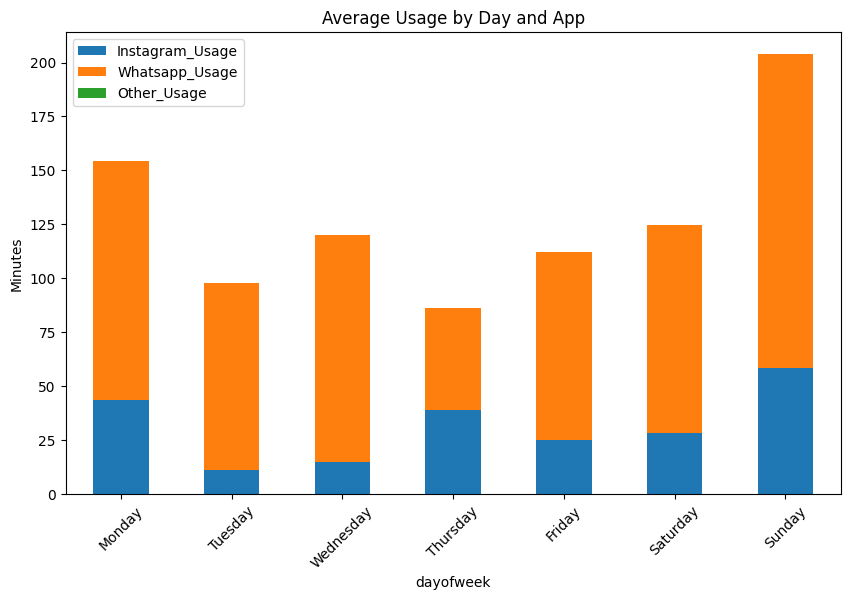

In [ ]:
#Social App Dominance by Day

data_combined['Other_Usage'] = data_combined['Total Usage'] - data_combined[['Instagram_Usage', 'Whatsapp_Usage']].sum()
usage_cols = ['Instagram_Usage', 'Whatsapp_Usage', 'Other_Usage']
data_combined.groupby('dayofweek')[usage_cols].mean().plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Average Usage by Day and App")
plt.xticks(rotation=45)
plt.ylabel("Minutes")
plt.show()

# Further Data Processing

# Data Model

In [ ]:
data_combined['dayofweek'] = data_combined['Date'].dt.dayofweek
data_combined['is_weekend'] = data_combined['dayofweek'].isin([5, 6]).astype(int)
data_combined['lag_usage'] = data_combined['Total Usage'].shift(1).fillna(data_combined['Total Usage'].mean())
data_combined['Other_Usage'] = data_combined['Total Usage'] - data_combined[['Instagram_Usage', 'Whatsapp_Usage']].sum()
data_combined['Social_Share'] = (data_combined['Instagram_Usage'] + data_combined['Whatsapp_Usage']) / data_combined['Total Usage']
data_combined['doomscroll'] = ((data_combined['Total Usage'] > 250) & (data_combined['Social_Share'] > 0.6)).astype(int)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in ['Rank 1', 'Rank 2', 'Rank 3']:
    data_combined[col] = le.fit_transform(data_combined[col])

In [ ]:
# Get the mapping for LabelEncoder:
rank1_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
rank1_mapping

{'Chrome': 0,
 'Gmail': 1,
 'Hulu': 2,
 'Instagram': 3,
 'Linkedin': 4,
 'Maps': 5,
 'Netflix': 6,
 'Spotify': 7,
 'WeChat': 8,
 'YouTube': 9}

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import f1_score

# Assuming data_combined is your DataFrame (replace with actual name if different)
# Fill missing doomscroll values (if any) - assuming 3 rows are NaN
data_combined['Date'] = pd.to_datetime(data_combined['Date'])
data_combined['dayofweek'] = data_combined['Date'].dt.dayofweek
data_combined['is_weekend'] = data_combined['dayofweek'].isin([5, 6]).astype(int)
data_combined['Social_Share'] = (data_combined['Instagram_Usage'] + data_combined['Whatsapp_Usage']) / data_combined['Total Usage']

# Ensure no NaNs in doomscroll - recompute if needed
data_combined['doomscroll'] = ((data_combined['Total Usage'] > 250) & (data_combined['Social_Share'] > 0.6)).astype(int)
print("Doomscroll Counts (Fixed):", data_combined['doomscroll'].value_counts())

# Features - minimal set to avoid overfitting
X = data_combined[['dayofweek', 'is_weekend', 'Instagram_Usage', 'Whatsapp_Usage',
                   'Notifications', 'Unlocks']]
y = data_combined['doomscroll']

# LOOCV
loo = LeaveOneOut()
model = LogisticRegression(max_iter=1000, random_state=42)
y_true, y_pred = [], []
for train_idx, test_idx in loo.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    model.fit(X_train, y_train)
    y_pred.append(model.predict(X_test)[0])
    y_true.append(y_test.values[0])

# Metrics
accuracy = np.mean(np.array(y_true) == np.array(y_pred))
f1 = f1_score(y_true, y_pred)
print("LOOCV Accuracy:", accuracy)
print("F1-Score:", f1)

# Predict doomscroll risk by day (average probability)
day_risks = {}
for day in range(7):
    day_data = X[data_combined['dayofweek'] == day]
    if not day_data.empty:
        probs = model.predict_proba(day_data)[:, 1]
        day_risks[day] = np.mean(probs)

# Results table
day_risk_df = pd.DataFrame(day_risks.items(), columns=['Day', 'Doomscroll Risk'])
day_mapping = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
day_risk_df['Day'] = day_risk_df['Day'].map(day_mapping)
day_risk_df['Doomscroll Risk'] = day_risk_df['Doomscroll Risk'].apply(lambda x: f"{x*100:.1f}%")
print("\nDoomscroll Risk by Day:")
print(day_risk_df)

Doomscroll Counts (Fixed): doomscroll
0    21
1     6
Name: count, dtype: int64
LOOCV Accuracy: 0.8888888888888888
F1-Score: 0.7272727272727273

Doomscroll Risk by Day:
         Day Doomscroll Risk
0     Monday           25.1%
1    Tuesday            0.0%
2  Wednesday           25.0%
3   Thursday            0.0%
4     Friday            0.2%
5   Saturday           25.0%
6     Sunday           74.7%
